<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from joblib import Parallel, delayed 
import joblib 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from xgboost import XGBClassifier
from pycaret.regression import *
from pycaret.classification import *

## Load and Prepare Data

In [2]:
vaccin = pd.read_csv('country_vaccinations.csv')
vaccin.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [3]:
vaccin.shape

(31240, 15)

In [4]:
vaccin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [5]:
vaccin.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

## EDA

In [6]:
vaccin.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [7]:
vaccin.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.745100e+04,1.655400e+04,1.379500e+04,1.442100e+04,3.094800e+04,17451.000000,16554.000000,13795.000000,30948.000000
mean,1.200444e+07,5.704551e+06,3.293973e+06,2.273661e+05,1.149718e+05,29.283554,19.181574,12.340698,3426.365969
std,6.622349e+07,2.101612e+07,1.234425e+07,1.258556e+06,8.460548e+05,35.042304,20.734193,15.857682,4572.377684
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.262015e+05,9.999100e+04,4.832450e+04,4.324000e+03,8.520000e+02,2.970000,2.580000,1.320000,412.000000
50%,8.890780e+05,6.450395e+05,3.632100e+05,2.133600e+04,6.471000e+03,14.510000,10.730000,5.560000,1851.000000
75%,4.213660e+06,2.809300e+06,1.635366e+06,9.441700e+04,3.545425e+04,44.460000,30.890000,17.610000,5123.000000
max,1.426347e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [8]:
vaccin['vaccines'].value_counts()

vaccines
Oxford/AstraZeneca                                                                             4805
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                  4118
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                                   2588
Oxford/AstraZeneca, Sinopharm/Beijing                                                          2368
Oxford/AstraZeneca, Pfizer/BioNTech                                                            2058
Moderna, Pfizer/BioNTech                                                                       1480
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                              1447
Pfizer/BioNTech                                                                                1155
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                                   1029
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V                                    

## Data Preprocessing

In [9]:
unique_vaccine_companies = []
companies = [company.split(', ') for company in set(vaccin["vaccines"])]
for c in companies:
    for x in c:
        unique_vaccine_companies.append(x)

In [10]:
unique_vaccine_companies = np.unique(unique_vaccine_companies)

In [11]:
unique_vaccine_companies

array(['Abdala', 'CanSino', 'Covaxin', 'EpiVacCorona', 'Johnson&Johnson',
       'Moderna', 'Oxford/AstraZeneca', 'Pfizer/BioNTech', 'QazVac',
       'RBD-Dimer', 'Sinopharm/Beijing', 'Sinopharm/HayatVax',
       'Sinopharm/Wuhan', 'Sinovac', 'Soberana02', 'Sputnik V'],
      dtype='<U18')

In [12]:
countries = list(vaccin['country'].unique())

In [13]:
vaccin['country'].value_counts()

country
Norway                             226
Latvia                             224
England                            220
Scotland                           220
Northern Ireland                   215
                                  ... 
Chad                                36
Niue                                16
Pitcairn                             7
Turkmenistan                         1
Bonaire Sint Eustatius and Saba      1
Name: count, Length: 218, dtype: int64

In [14]:
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faeroe Islands',
 'Falkland Islands',
 'Fiji',
 'Finland',
 

In [15]:
vaccin.isnull().sum().sort_values(ascending = False)

people_fully_vaccinated                17445
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_raw                 16819
people_vaccinated                      14686
people_vaccinated_per_hundred          14686
total_vaccinations                     13789
total_vaccinations_per_hundred         13789
daily_vaccinations                       292
daily_vaccinations_per_million           292
country                                    0
iso_code                                   0
date                                       0
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [16]:
vaccin_cleaned = vaccin.fillna(0.0)

In [17]:
vaccin_cleaned.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [18]:
vaccin_cleaned['date'] = pd.to_datetime(vaccin.date)

In [19]:
vaccin_cleaned = vaccin_cleaned.sort_values('date', ascending = True)
vaccin_cleaned.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
21109,Norway,NOR,2020-12-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://www.fhi.no/sv/vaksine/koronavaksinasjo...
21110,Norway,NOR,2020-12-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://www.fhi.no/sv/vaksine/koronavaksinasjo...
21111,Norway,NOR,2020-12-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://www.fhi.no/sv/vaksine/koronavaksinasjo...
15554,Latvia,LVA,2020-12-04,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
21112,Norway,NOR,2020-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://www.fhi.no/sv/vaksine/koronavaksinasjo...


In [20]:
vaccin_cleaned['month'] = vaccin_cleaned.date.dt.month

vaccin_cleaned = vaccin_cleaned.drop('daily_vaccinations_raw', axis=1)

vaccin_cleaned = vaccin_cleaned.drop(['source_name', 'source_website'], axis=1)
vaccin_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31240 entries, 21109 to 31239
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              31240 non-null  object        
 1   iso_code                             31240 non-null  object        
 2   date                                 31240 non-null  datetime64[ns]
 3   total_vaccinations                   31240 non-null  float64       
 4   people_vaccinated                    31240 non-null  float64       
 5   people_fully_vaccinated              31240 non-null  float64       
 6   daily_vaccinations                   31240 non-null  float64       
 7   total_vaccinations_per_hundred       31240 non-null  float64       
 8   people_vaccinated_per_hundred        31240 non-null  float64       
 9   people_fully_vaccinated_per_hundred  31240 non-null  float64       
 10  daily_vacci

In [21]:
vaccin_cleaned.drop_duplicates()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,month
21109,Norway,NOR,2020-12-02,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Pfizer/BioNTech",12
21110,Norway,NOR,2020-12-03,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Pfizer/BioNTech",12
21111,Norway,NOR,2020-12-04,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Pfizer/BioNTech",12
15554,Latvia,LVA,2020-12-04,1.0,1.0,0.0,0.0,0.00,0.00,0.00,0.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",12
21112,Norway,NOR,2020-12-05,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Pfizer/BioNTech",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19980,Netherlands,NLD,2021-07-15,18273238.0,11598738.0,7419262.0,127546.0,106.64,67.69,43.30,7444.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",7
13763,Isle of Man,IMN,2021-07-15,117677.0,64400.0,53277.0,715.0,138.39,75.74,62.66,8409.0,"Oxford/AstraZeneca, Pfizer/BioNTech",7
13972,Israel,ISR,2021-07-15,10959646.0,5740839.0,5218807.0,8192.0,126.62,66.33,60.29,946.0,"Moderna, Pfizer/BioNTech",7
9875,France,FRA,2021-07-15,63174862.0,36766279.0,27070389.0,569193.0,93.50,54.42,40.07,8424.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",7


## Strorytelling - Visualization

In [22]:
vaccines_countries = vaccin_cleaned.groupby('country')['vaccines'].unique()


In [23]:
vaccines_countries_df = pd.DataFrame(vaccines_countries)


In [24]:
vaccines_countries_df.style

,vaccines
country,
Afghanistan,"['Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing']"
Albania,"['Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V']"
Algeria,"['Oxford/AstraZeneca, Sputnik V']"
Andorra,"['Oxford/AstraZeneca, Pfizer/BioNTech']"
Angola,['Oxford/AstraZeneca']
Anguilla,['Oxford/AstraZeneca']
Antigua and Barbuda,['Oxford/AstraZeneca']
Argentina,"['Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V']"
Armenia,"['Oxford/AstraZeneca, Sinovac, Sputnik V']"


In [25]:
vaccines_countries_df.query('country == "Laos"').iloc[[0]]

,vaccines
country,
Laos,"[Sinopharm/Beijing, Sputnik V]"


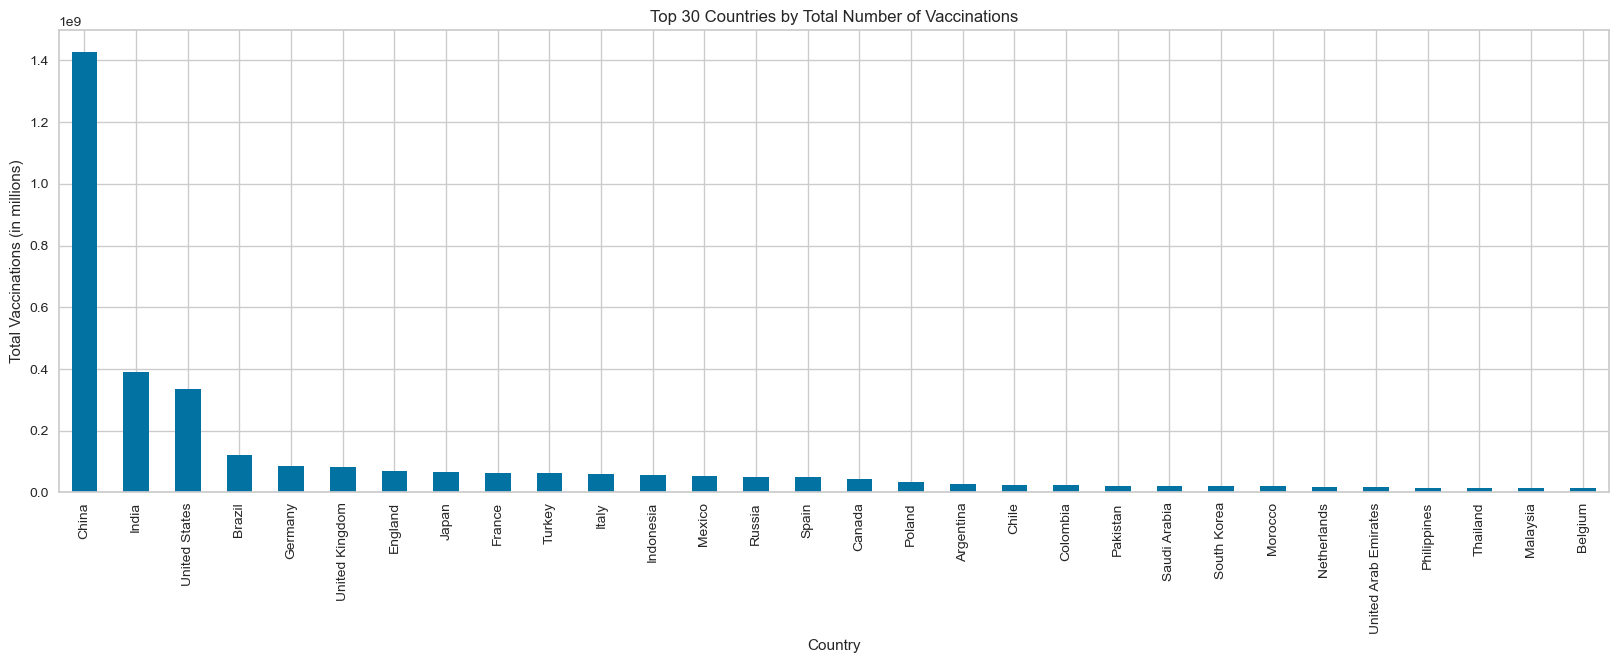

In [26]:
vaccin_cleaned.groupby(['country'])['total_vaccinations'].max().sort_values(ascending = False).head(30).plot(kind = 'bar', figsize = (20,6))
plt.title('Top 30 Countries by Total Number of Vaccinations')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations (in millions)');

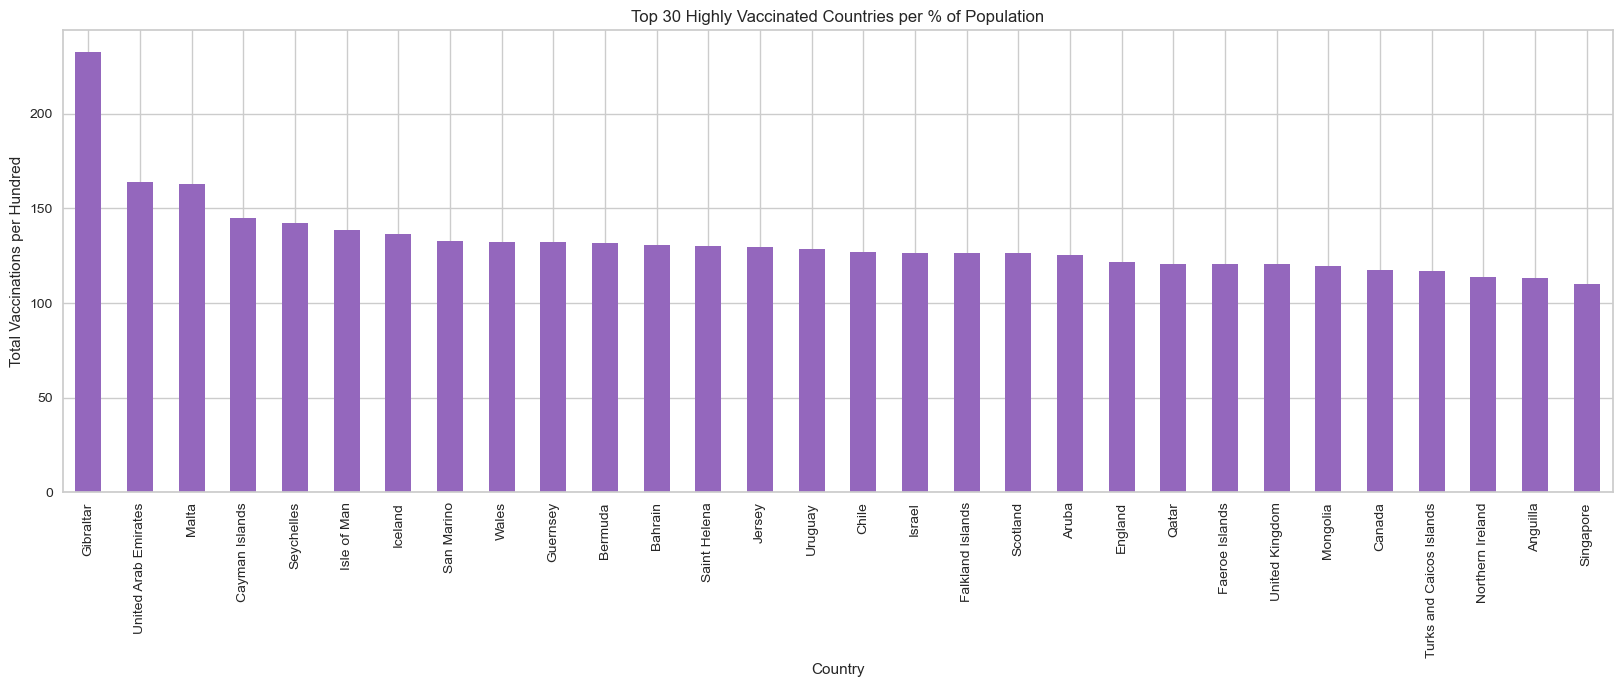

In [27]:
vaccin_cleaned.groupby(['country'])['total_vaccinations_per_hundred'].max().sort_values(ascending = False).head(30).plot(kind = 'bar', figsize = (20,6), color = 'tab:purple')
plt.title('Top 30 Highly Vaccinated Countries per % of Population')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations per Hundred');

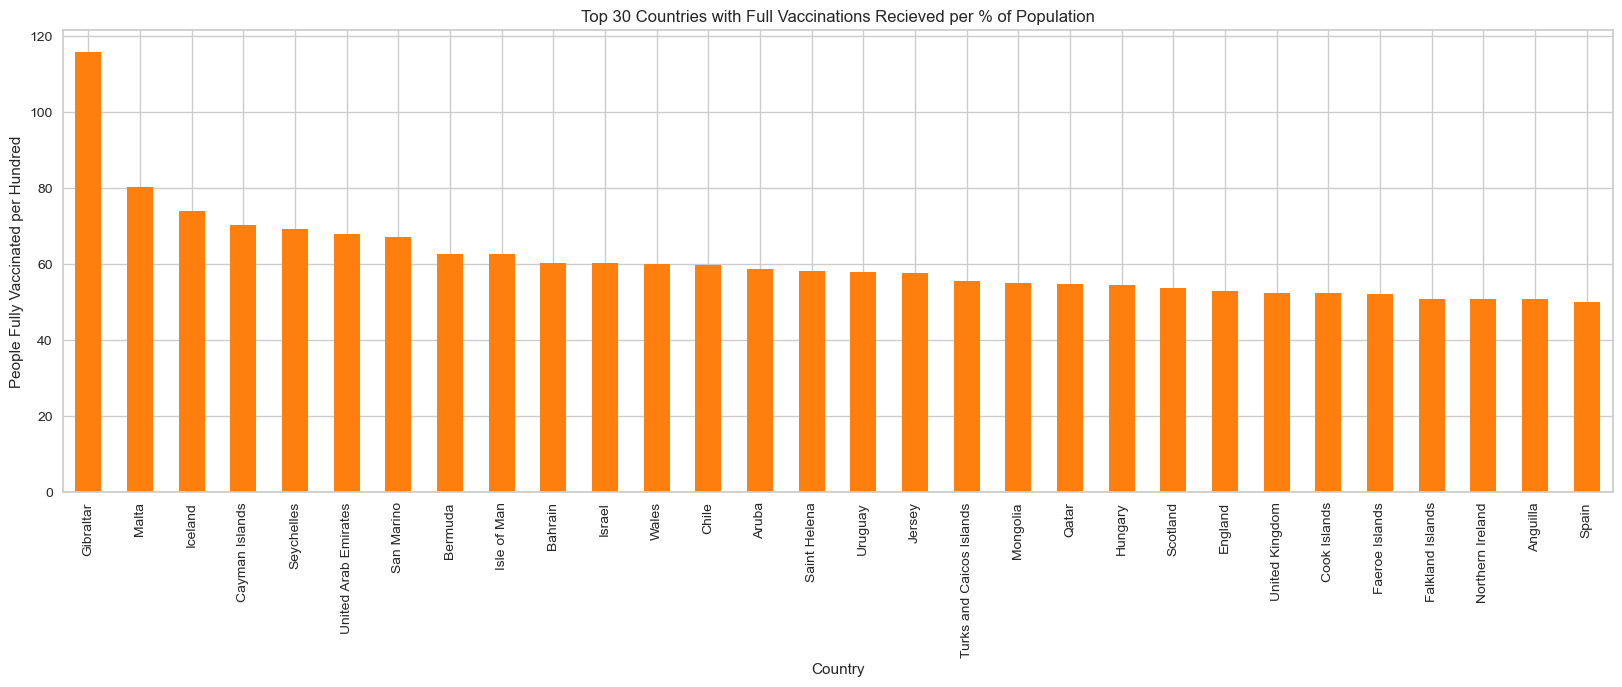

In [28]:
vaccin_cleaned.groupby(['country'])['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False).head(30).plot(kind = 'bar', figsize = (20,6), color = 'tab:orange')
plt.title('Top 30 Countries with Full Vaccinations Recieved per % of Population')
plt.xlabel('Country')
plt.ylabel('People Fully Vaccinated per Hundred');

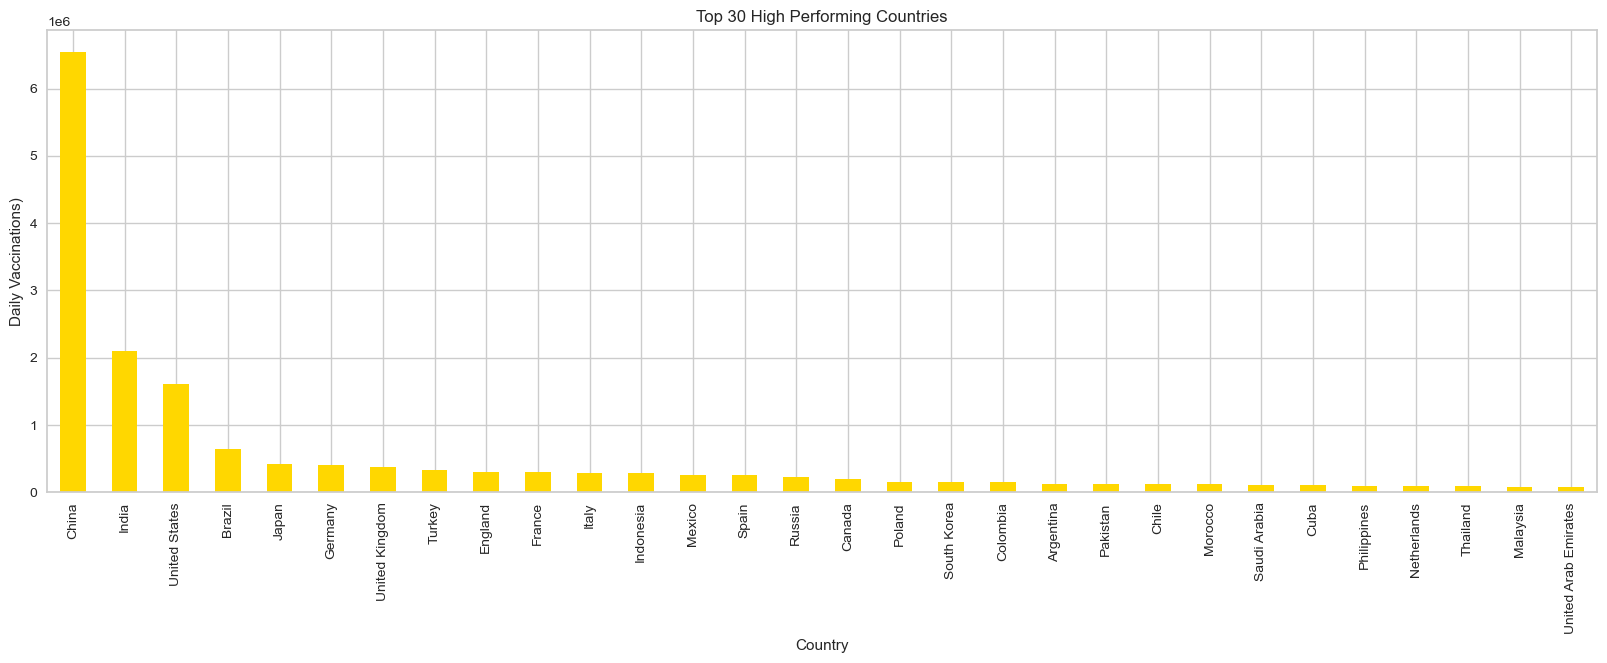

In [29]:
vaccin_cleaned.groupby(['country'])['daily_vaccinations'].mean().sort_values(ascending = False).head(30).plot(kind = 'bar', figsize = (20,6), color = 'gold')
plt.title('Top 30 High Performing Countries')
plt.xlabel('Country')
plt.ylabel('Daily Vaccinations)');

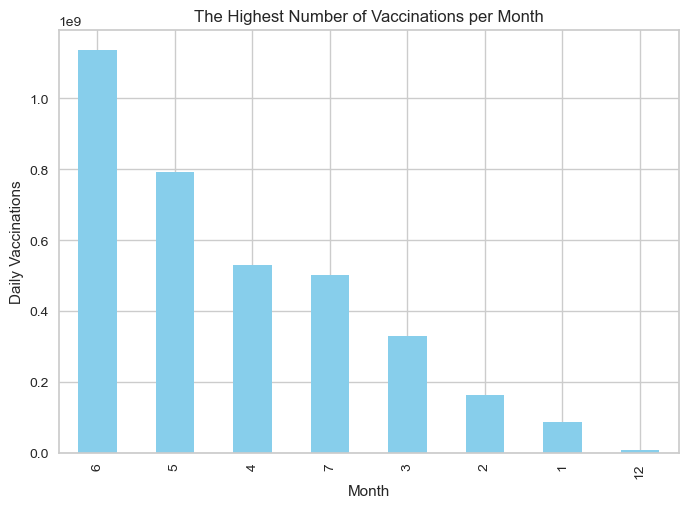

In [30]:
vaccin_cleaned.groupby(['month'])['daily_vaccinations'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'skyblue')
plt.title('The Highest Number of Vaccinations per Month')
plt.xlabel('Month')
plt.ylabel('Daily Vaccinations');

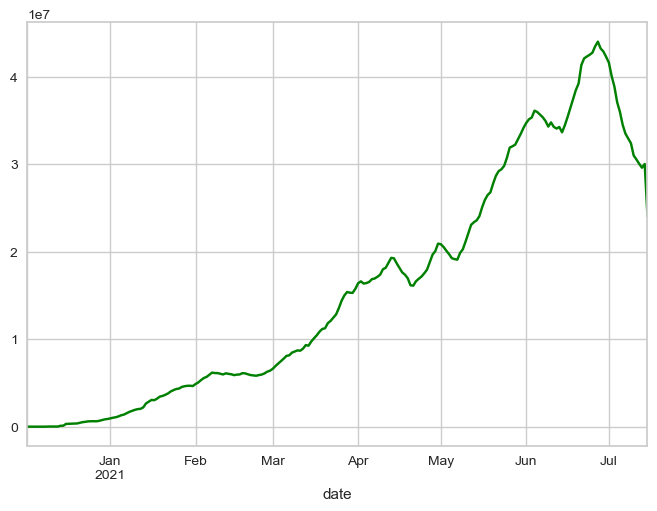

In [31]:
vaccin_cleaned.groupby('date')['daily_vaccinations'].sum().plot(kind = 'line', color = 'green');

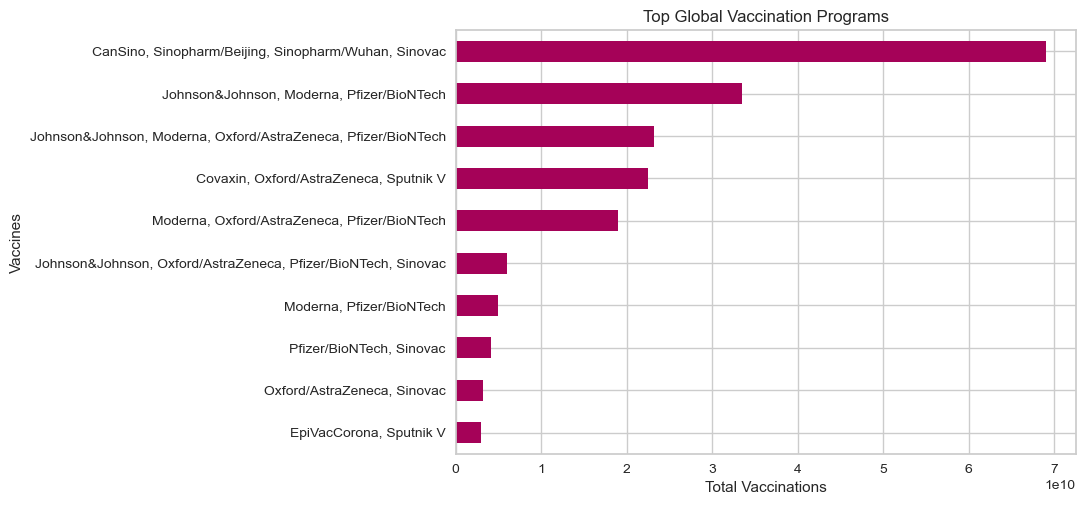

In [32]:
vaccin_cleaned.groupby('vaccines')['total_vaccinations'].sum().sort_values(ascending=False).head(10).plot(kind = 'barh', color = 'm')
plt.gca().invert_yaxis()
plt.title('Top Global Vaccination Programs')
plt.xlabel('Total Vaccinations')
plt.ylabel('Vaccines');

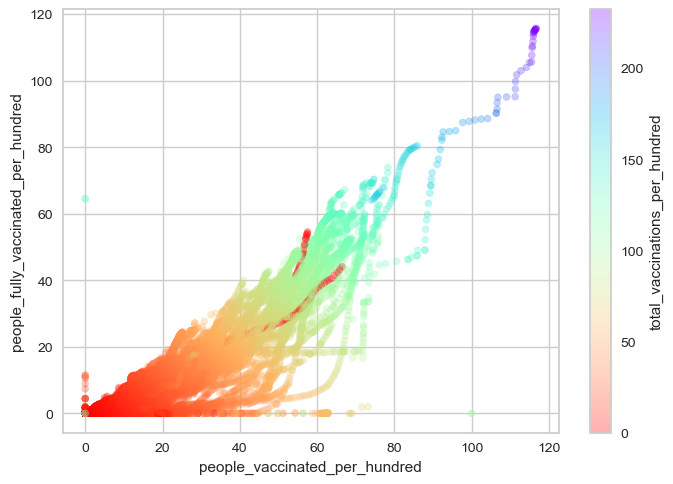

In [33]:
vaccin_cleaned.plot(kind ='scatter', x = 'people_vaccinated_per_hundred', y= 'people_fully_vaccinated_per_hundred', c ='total_vaccinations_per_hundred', s=25, cmap= 'rainbow_r', alpha=0.3);

## Prepare Data for Machine learning

In [34]:
vaccin_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31240 entries, 21109 to 31239
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              31240 non-null  object        
 1   iso_code                             31240 non-null  object        
 2   date                                 31240 non-null  datetime64[ns]
 3   total_vaccinations                   31240 non-null  float64       
 4   people_vaccinated                    31240 non-null  float64       
 5   people_fully_vaccinated              31240 non-null  float64       
 6   daily_vaccinations                   31240 non-null  float64       
 7   total_vaccinations_per_hundred       31240 non-null  float64       
 8   people_vaccinated_per_hundred        31240 non-null  float64       
 9   people_fully_vaccinated_per_hundred  31240 non-null  float64       
 10  daily_vacci

In [35]:
x = vaccin_cleaned[['people_vaccinated','people_fully_vaccinated','daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million']]
y = vaccin_cleaned['total_vaccinations']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(23430, 7)
(23430,)
(7810, 7)
(7810,)


In [37]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6
0,-0.166265,-0.167351,-0.111324,-0.495418,-0.493345,-0.433920,-0.615417
1,-0.160338,-0.157611,-0.127008,-0.237275,-0.156637,-0.293029,-0.576475
2,-0.189897,-0.173435,-0.123318,-0.517649,-0.521729,-0.446951,-0.488909
3,-0.191289,-0.173128,-0.132093,-0.543529,-0.565139,-0.446951,-0.744787
4,-0.152282,-0.109971,-0.127063,1.456578,1.361054,1.885488,-0.106742


## Train your model

In [38]:
#multi layer perceptron
model = MLPClassifier(hidden_layer_sizes = (100, 100), activation ='relu', 
                      solver = 'adam', max_iter = 50)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.626333760136577
Testing Accuracy : 0.4507042253521127


## Test the model and show the metrics

## Save your final model

In [39]:
joblib.dump(model, 'filename.pkl') 

['filename.pkl']